<a href="https://colab.research.google.com/github/rlawogjs96/deeplearningnlp_starters/blob/main/%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**은닉 상태:** 메모리 셀이 출력층 방향 또는 다음 시점인 t+1의 자신에게 보내는 값을 은닉상태라고 합니다. t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용한다. 

은닉상태값: $$h_t$$



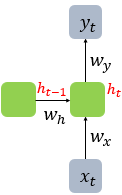

은닉층: 
$$h_t = tanh(W_xx_t +W_hh_{t+1}+b)$$

출력층: 
$$y_t = f(W_yh_t + b)$$

**hidden_units:** 
은닉 상태의 크기. 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기. 

**timesteps:** 
입력 시퀀스의 길이. 시점의 수 

**input_dim:**
입력의 크기

In [ ]:
# RNN 층을 추가
model.add(SimpleRNN(hidden_units))

# 추가 인자 사용 
model.add(SimpleRNN(hidden_units, input_shape = (timesteps, input_dim)))

RNN 층은 위에서 설명한 입력 3D 텐서를 입력받아서 어떻게 은닉 상태를 출력할까? 
RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력을 내보낸다. 

1.   **메모리 셀의 최종 시점의 은닉 상태만을 리턴한다면:**
    *   (batch_size, output_dim) 크기의 2D 텐서를 리턴한다. 

2.   **메모리 셀의 각 시점 (timestep)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하고자 한다면:** 
    *   (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴한다. 
    *   이는 RNN 층의 return_sequences 매개 변수에 True를 설정하여 설정이 가능하다. 



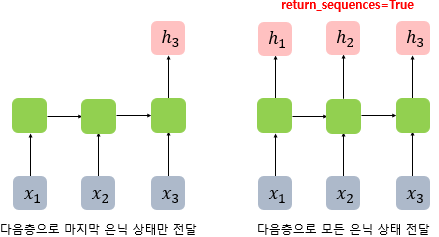

return_sequences = True로 선택하면 메모리 셀이 모든 시점에 대해서 은닉 상태값 출력. return_sequences = False로 선택하면 메모리 셀은 하나의 은닉 상태값만을 출력. 

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import SimpleRNN 

model = Sequential() 

#model.add(SimpleRNN(hidden_units, input_shape = (timesteps, input_dim)))
model.add(SimpleRNN(3, input_shape=(2,10))) # 은닉상태크기 = 3, 시점의 수  = 2, 입력크기 = 10

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력값이 (batch_size, output_dim) 크기의 2D 텐서인 경우, output_dim 은 hidden_units의 값인 3이다. 현재 batch_size를 현 단계에서는 알 수 없으므로 (None, 3)이 된다. 

In [ ]:
# Batch Size 를 미리 정한 경우 
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# return_sequences = True --> Return 3D Tensor 
model = Sequential() 
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences = True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


# RNN Using Python
**Calculate hidden_state:**
$$h_t = tanh(W_xX_t + W_hh_{t-1}+b)$$

In [ ]:
# pseudocode
# Numpy 로 RNN층을 구현 

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다. 
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산 
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.

입력 데이터의 길이 = input_length. 입력 데이터의 길이는 곧 총 시점의 수 (timesteps)가 된다. 그리고 t 시점의 입력값을 input_t로 선언한다. t 시점의 입력값은 input_t가 된다. 각 메모리 셀은 각 시점마다 input_t와 hidden_state_t를 입력으로 활성화 함수인 $tanh$ 함수를 통해 현시점의 hidden_state_t를 계산한다.

In [ ]:
import numpy as np

timesteps = 10 # 시점의 수 
input_dim = 4 # 입력 크기 
hidden_units = 8 # 은닉 상태 크기 

# 입력에 해당되는 2D 텐서 
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0으로 초기화 
hidden_state_t = np.zeros((hidden_units,))

print('초기 은닉 상태 :', hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


hidden_units = 8: 8차원을 가지는 0의 값으로 구성된 벡터 출력. 

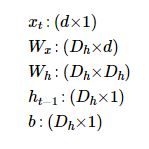

In [ ]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [ ]:
total_hidden_states = []

# 각 시점 별 입력값 
for input_t in inputs: 

  # Wx*Xt + Wh*Ht-1 + b(bias)
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적 
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0) 

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.82836743 0.95202649 0.95367436 0.47871179 0.89126026 0.87730519
  0.95860576 0.91928061]
 [0.99994883 0.99964111 0.99997993 0.9967665  0.99999365 0.99994822
  0.99999248 0.99999002]
 [0.9999917  0.99995772 0.99999628 0.99893403 0.99999915 0.99998485
  0.99999957 0.99999958]
 [0.9999835  0.99989465 0.99999305 0.99832293 0.99999849 0.99996838
  0.99999889 0.99999883]
 [0.99998083 0.99991747 0.99998832 0.99849403 0.999996   0.99994127
  0.99999891 0.9999992 ]
 [0.99998493 0.99993275 0.99999421 0.99874306 0.99999908 0.99998188
  0.99999874 0.99999828]
 [0.9999918  0.99997585 0.99999628 0.99925198 0.9999993  0.99998989
  0.99999954 0.99999945]
 [0.99998872 0.99997035 0.99999553 0.99923127 0.99999931 0.99999068
  0.99999963 0.99999934]
 [0.99995058 0.99977186 0.99998447 0.99794073 0.99999801 0.99996226
  0.99999829 0.99999573]
 [0.99997866 0.99991955 0.99999067 0.99864564 0.99999828 0.99997077
  0.99999844 0.99999798]]
